# Lab 1

# STRAIGHT TO ACTION!

Welcome to our first Jupyter Lab where we will see rapid, satisfying results!

I will leave with you to try out leading LLMs through their Chat Interfaces

Together, we will call them using their APIs

Please see the README for instructions on setting this up and getting your API key

# If this is your first time in a Notebook..

Welcome to the world of Data Science experimentation. Warning: Jupyter Notebooks are very addictive and you may find it hard to go back to IDEs afterwards!!

Simply click in each cell with code and press `Shift + Enter` to execute the code and print the results.

There's a notebook called "Guide to Jupyter" in the parent directory that will give you a handy tutorial on all things Jupyter Lab.

## Part 1: For you to experiment: Frontier models through their Chat UI

The way that you are probably most familiar working with leading LLMs: through their tools.  
Some questions you can try asking them:
1. What kinds of business problem are most suitable for an LLM solution?
2. How many words are there in your answer to this prompt?
3. How many rainbows does it take to jump from Hawaii to seventeen?
4. What does it feel like to be jealous?

**ChatGPT** from OpenAI needs no introduction.

Let's try some hard questions, and use the new o1 model as well as GPT-4o. Also try GPT-4o with canvas.

https://chatgpt.com/?model=gpt-4o

**Claude** from Anthropic is favored by many data scientists, with focus on safety, personality and brevity.

https://claude.ai/new

**Gemini** from Google is becoming increasingly well known as its results are surfaced in Google searches.

https://gemini.google.com/app

**Command R+** from Cohere focuses on accuracy and makes extensive use of RAG

https://coral.cohere.com/

**Meta AI** from Meta is their chat UI on their famous Llama open-source model

https://www.meta.ai/

**Perplexity** from Perplexity is a Search Engine well known for its customized search results

https://www.perplexity.ai/

**LeChat** from Mistral is the Web UI from the French AI powerhouse

https://chat.mistral.ai/

**DeepSeek** from DeepSeek AI needs no introduction! Deepseek-R1 is the Reasoning model, V3 is their Chat model.

https://chat.deepseek.com/


## Conclusions and Takeways from exploring the Chat UIs

- These models are astonishing
- Reasoning vs Chat models - different capabilities and use cases. Reasoning better for research but not for conversation.
- Price is highly competitive

You'll find cost and other comparisons at this very useful leaderboard:

https://www.vellum.ai/llm-leaderboard

## PART 2: Calling Frontier Models through APIs

## Setting up your keys

If you haven't done so already, you'll need to create API keys from OpenAI, Anthropic and Google, and also DeepSeek and Groq if you wish.

For OpenAI, visit https://openai.com/api/  
For Anthropic, visit https://console.anthropic.com/  
For Google, visit https://ai.google.dev/gemini-api  

When you get your API keys, you need to set them as environment variables.

EITHER (recommended) create a file called `.env` in this project root directory, and set your keys there:

```
OPENAI_API_KEY=xxxx
ANTHROPIC_API_KEY=xxxx
GOOGLE_API_KEY=xxxx
DEEPSEEK_API_KEY=xxxx
GROQ_API_KEY=xxxx
```

OR enter the keys directly in the cells below.

## Two purposes of these APIs:

1. Illustrate how to use the APIs and switch between LLMs
2. Experiment with some LLMs and understand their strengths and weaknesses

In [1]:
# imports

import os
import json
import requests
from dotenv import load_dotenv
from openai import OpenAI
from IPython.display import Markdown, display, update_display

In [2]:
# Load environment variables in a file called .env
# Print the key prefixes to help with any debugging

load_dotenv(override=True)
openai_api_key = os.getenv('OPENAI_API_KEY')
anthropic_api_key = os.getenv('ANTHROPIC_API_KEY')
google_api_key = os.getenv('GOOGLE_API_KEY')
deepseek_api_key = os.getenv('DEEPSEEK_API_KEY')
groq_api_key = os.getenv('GROQ_API_KEY')
grok_api_key = os.getenv('GROK_API_KEY')

if openai_api_key:
    print(f"OpenAI API Key exists and begins {openai_api_key[:8]}")
else:
    print("OpenAI API Key not set")
    
if anthropic_api_key:
    print(f"Anthropic API Key exists and begins {anthropic_api_key[:7]}")
else:
    print("Anthropic API Key not set (and this is optional)")

if google_api_key:
    print(f"Google API Key exists and begins {google_api_key[:2]}")
else:
    print("Google API Key not set (and this is optional)")

if deepseek_api_key:
    print(f"DeepSeek API Key exists and begins {deepseek_api_key[:3]}")
else:
    print("DeepSeek API Key not set (and this is optional)")

if groq_api_key:
    print(f"Groq API Key exists and begins {groq_api_key[:4]}")
else:
    print("Groq API Key not set (and this is optional)")

if grok_api_key:
    print(f"Grok API Key exists and begins {grok_api_key[:4]}")
else:
    print("Grok API Key not set (and this is optional)")

OpenAI API Key exists and begins sk-proj-
Anthropic API Key not set (and this is optional)
Google API Key not set (and this is optional)
DeepSeek API Key not set (and this is optional)
Groq API Key not set (and this is optional)
Grok API Key not set (and this is optional)


## Connecting to Python Client libraries

We call Cloud APIs by making REST calls to an HTTP endpoint, passing in our keys.

For convenience, the labs like OpenAI have provided lightweight python client libraries that make the HTTP calls for us.

In [3]:
# Connect to OpenAI client library
# A thin wrappes around calls to REST endpoints

openai = OpenAI()

# We can use the OpenAI python client for all the others, because everyone has produced endpoints compatible with OpenAI
# And OpenAI allows you to change the base_url

anthropic_url = "https://api.anthropic.com/v1/"
gemini_url = "https://generativelanguage.googleapis.com/v1beta/openai/"
deepseek_url = "https://api.deepseek.com"
groq_url = "https://api.groq.com/openai/v1"
grok_url = "https://api.x.ai/v1"

anthropic = OpenAI(api_key=anthropic_api_key, base_url=anthropic_url)
gemini = OpenAI(api_key=google_api_key, base_url=gemini_url)
deepseek = OpenAI(api_key=deepseek_api_key, base_url=deepseek_url)
groq = OpenAI(api_key=groq_api_key, base_url=groq_url)
grok = OpenAI(api_key=grok_api_key, base_url=grok_url)

## Asking LLMs a hard question that will put them to the test and illustrate their power

We will come up with a challenging question to test out model performance with language and nuance.

### What information is included in the API

Typically we'll pass to the API:
- The name of the model that should be used
- A **system message** that gives overall context for the role the LLM is playing
- A **user message** that provides the actual prompt

There are other parameters that can be used, including **temperature** which is typically between 0 and 1; higher for more random output; lower for more focused and deterministic.

### The standard format of messages with an LLM, first used by OpenAI in its API and now adopted more widely

Conversations use this format:

```
[
    {"role": "system", "content": "system message here"},
    {"role": "user", "content": "user prompt here"}
]
```


In [4]:
# The hardest question I could come up with

system_message = "You are able to explain abstract concepts clearly and concisely, with powerful analogies"

user_prompt = "In 1 sentence, describe a rainbow to someone who's never been able to see. \
Then in 1 sentence, describe the imaginary number i to someone who doesn't understand math. \
Then in 1 sentence, find a connection between rainbows and imaginary numbers. \
Then end by stating how many words are in your answer."

In [5]:
challenge = [
    {"role": "system", "content": system_message},
    {"role": "user", "content": user_prompt}
  ]

In [6]:
models = []
answers = []

def record(model, reply):
    display(Markdown(f"### Response from {model}:\n\n{reply}\n\n### Actual word count: {len(reply.split())}"))
    models.append(model)
    answers.append(reply)

In [7]:
# GPT-4.1-mini

model_name = "gpt-4.1-mini"

response = openai.chat.completions.create(model=model_name, messages=challenge)
reply = response.choices[0].message.content

record(model_name, reply)

### Response from gpt-4.1-mini:

A rainbow is like a graceful arch of colors stretched across the sky when sunlight dances through water droplets, painting the air with a hidden spectrum you can feel as warmth and wonder. The imaginary number i is like a magical key that unlocks a new dimension of numbers where the square root of a negative is possible, allowing us to solve puzzles no ordinary number can. Both rainbows and imaginary numbers reveal invisible worlds beyond everyday experience—rainbows show unseen colors in light, while imaginary numbers show unseen truths in mathematics. This answer has 69 words.

### Actual word count: 96

In [8]:
# GPT-4.1-nano

model_name = "gpt-4.1-nano"

response = openai.chat.completions.create(model=model_name, messages=challenge)
reply = response.choices[0].message.content

record(model_name, reply)

### Response from gpt-4.1-nano:

A rainbow is like a colorful bridge made by sunlight passing through water droplets, creating a spectrum of colors in the sky; the imaginary number i is like a secret code in math that represents a hidden dimension of numbers; both rainbows and imaginary numbers help us explore and understand what lies beyond everyday sight and intuition, opening new worlds of understanding; this explanation contains 66 words.

### Actual word count: 67

In [9]:
# GPT-4.1

model_name = "gpt-4.1"

response = openai.chat.completions.create(model=model_name, messages=challenge)
reply = response.choices[0].message.content

record(model_name, reply)

### Response from gpt-4.1:

A rainbow is like a gentle, invisible song in the air, revealing the many “notes” (colors) that sunlight holds when it passes through rain.  
The imaginary number i is like a special kind of step you can take—not forward or backward on a path, but sideways into a place you can't walk in real life.  
Both rainbows and imaginary numbers reveal hidden layers and possibilities beyond what we normally sense, showing beauty or structure in the unseen.  
61 words.

### Actual word count: 79

In [10]:
# o1
# o1 is a "reasoning" model that has been trained to think through it's answer before it replies..

model_name = "o1"

response = openai.chat.completions.create(model=model_name, messages=challenge)
reply = response.choices[0].message.content

record(model_name, reply)

### Response from o1:

A rainbow is like a soothing melody that subtly shifts through multiple vibrant tones in a graceful arc across the sky.  
The imaginary number i is like a secret door leading beyond the familiar hallway of real numbers into a realm of hidden possibilities.  
Rainbows and i both expand our perception to channels we cannot directly see, but can only grasp by understanding patterns.  
This entire answer has 70 words.  

### Actual word count: 70

In [11]:
# o3

model_name = "o3"

response = openai.chat.completions.create(model=model_name, messages=challenge)
reply = response.choices[0].message.content

record(model_name, reply)

### Response from o3:

A rainbow is like a silent symphony where the warmth of sunlight transforms into seven distinct notes of cool mist, arching across the sky in an invisible fan you could almost feel brushing your face.  
The imaginary number i is like an unseen direction you can walk that is neither forward nor backward nor left nor right, but still lets you reach new places that were impossible before.  
Both rainbows and i reveal hidden dimensions of our world, one bending light into unseen music, the other bending numbers into unseen directions.  
93 words.

### Actual word count: 93

In [12]:
# Claude 4.0 Sonnet
# API needs system message provided separately from user prompt
# Also adding max_tokens

model_name = "claude-sonnet-4-20250514"

response = anthropic.chat.completions.create(model=model_name, messages=challenge)
reply = response.choices[0].message.content

record(model_name, reply)

AuthenticationError: Error code: 401 - {'error': {'code': 'authentication_error', 'message': 'Invalid Anthropic API Key', 'type': 'invalid_request_error', 'param': None}}

In [13]:
# Gemini 2.5 Flash

model_name = "gemini-2.5-flash-preview-05-20"

response = gemini.chat.completions.create(model=model_name, messages=challenge)
reply = response.choices[0].message.content

record(model_name, reply)

BadRequestError: Error code: 400 - [{'error': {'code': 400, 'message': 'API key not valid. Please pass a valid API key.', 'status': 'INVALID_ARGUMENT', 'details': [{'@type': 'type.googleapis.com/google.rpc.ErrorInfo', 'reason': 'API_KEY_INVALID', 'domain': 'googleapis.com', 'metadata': {'service': 'generativelanguage.googleapis.com'}}, {'@type': 'type.googleapis.com/google.rpc.LocalizedMessage', 'locale': 'en-US', 'message': 'API key not valid. Please pass a valid API key.'}]}}]

In [14]:
# Gemini 2.5 Pro

model_name = "gemini-2.5-pro-preview-06-05"

response = gemini.chat.completions.create(model=model_name, messages=challenge)
reply = response.choices[0].message.content

record(model_name, reply)

BadRequestError: Error code: 400 - [{'error': {'code': 400, 'message': 'API key not valid. Please pass a valid API key.', 'status': 'INVALID_ARGUMENT', 'details': [{'@type': 'type.googleapis.com/google.rpc.ErrorInfo', 'reason': 'API_KEY_INVALID', 'domain': 'googleapis.com', 'metadata': {'service': 'generativelanguage.googleapis.com'}}, {'@type': 'type.googleapis.com/google.rpc.LocalizedMessage', 'locale': 'en-US', 'message': 'API key not valid. Please pass a valid API key.'}]}}]

In [12]:
# Deepseek-V3

model_name = "deepseek-chat"

response = deepseek.chat.completions.create(model=model_name, messages=challenge)
reply = response.choices[0].message.content

record(model_name, reply)

AuthenticationError: Error code: 401 - {'error': {'message': 'Authentication Fails, Your api key: ****xNgA is invalid', 'type': 'authentication_error', 'param': None, 'code': 'invalid_request_error'}}

In [16]:
# Deepseek-R1
# This takes too long! It can get stuck in a loop 

model_name = "deepseek-reasoner"

response = deepseek.chat.completions.create(model=model_name, messages=challenge)
reply = response.choices[0].message.content

record(model_name, reply)

AuthenticationError: Error code: 401 - {'error': {'message': 'Authentication Fails, Your api key: ****xNgA is invalid', 'type': 'authentication_error', 'param': None, 'code': 'invalid_request_error'}}

In [17]:
# Groq - llama-3.3-70b-versatile

model_name = "llama-3.3-70b-versatile"

response = groq.chat.completions.create(model=model_name, messages=challenge)
reply = response.choices[0].message.content

record(model_name, reply)

AuthenticationError: Error code: 401 - {'error': {'message': 'Invalid API Key', 'type': 'invalid_request_error', 'code': 'invalid_api_key'}}

In [18]:
# Groq - deepseek-r1-distill-llama-70b

model_name = "deepseek-r1-distill-llama-70b"

response = groq.chat.completions.create(model=model_name, messages=challenge)
reply = str(response.choices[0].message.content)

if '</think>' in reply:
    reply = reply.split('</think>')[1]

record(model_name, reply)

AuthenticationError: Error code: 401 - {'error': {'message': 'Invalid API Key', 'type': 'invalid_request_error', 'code': 'invalid_api_key'}}

In [19]:
# Grok

model_name = "grok-3-latest"

response = grok.chat.completions.create(model=model_name, messages=challenge)
reply = response.choices[0].message.content

record(model_name, reply)

BadRequestError: Error code: 400 - {'code': 'Client specified an invalid argument', 'error': 'Incorrect API key provided: sk***gA. You can obtain an API key from https://console.x.ai.'}

# Now for Part 3

### Recap: first we tried Frontier LLMs through their chat interfaces

### Then we called Cloud APIs

### And now:

Now try the 3rd way to use LLMs - direct inference of Open Source Models running locally with Ollama¶
Visit the README for instructions on installing Ollama locally.

You can see some comparisons of Open Source models on the HuggingFace OpenLLM Leaderboard.

Ollama provides an OpenAI-style local endpoint, so this will look very similar to part 2!


In [13]:
!ollama pull llama3.2
!ollama pull gemma3
!ollama pull qwen3
!ollama pull phi4
!ollama pull deepseek-r1

pulling manifest ⠋ pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠸ pulling manifest ⠼ pulling manifest ⠴ pulling manifest 
pulling dde5aa3fc5ff: 100% ▕██████████████████▏ 2.0 GB                         
pulling 966de95ca8a6: 100% ▕██████████████████▏ 1.4 KB                         
pulling fcc5a6bec9da: 100% ▕██████████████████▏ 7.7 KB                         
pulling a70ff7e570d9: 100% ▕██████████████████▏ 6.0 KB                         
pulling 56bb8bd477a5: 100% ▕██████████████████▏   96 B                         
pulling 34bb5ab01051: 100% ▕██████████████████▏  561 B                         
verifying sha256 digest 
writing manifest 
success 
pulling manifest ⠋ pulling manifest ⠙ pulling manifest ⠹ pulling manifest 
pulling aeda25e63ebd: 100% ▕██████████████████▏ 3.3 GB                         
pulling e0a42594d802: 100% ▕██████████████████▏  358 B                         
pulling dd084c7d92a3: 100% ▕██████████████████▏ 8.4 KB                         
pulling 3116c5225075:

In [14]:
ollama_url = 'http://localhost:11434/v1'
ollama = OpenAI(base_url=ollama_url, api_key='ollama')

In [15]:
requests.get("http://localhost:11434").content

b'Ollama is running'

In [16]:
# llama3.2

model_name = "llama3.2"

response = ollama.chat.completions.create(model=model_name, messages=challenge)
reply = response.choices[0].message.content

record(model_name, reply)

### Response from llama3.2:

Describing an abstract concept without relying on visual references: A rainbow is like a symphony of light and sound, with colors intertwining like different melodies that harmonize to create a breathtaking whole.

Similarly describing the imaginary number i: An imaginary number i is like a musical note that exists only in our minds' music sheets, representing an absence or a delay that becomes essential for understanding harmony in mathematics.

Connecting rainbows and imaginary numbers: Just as a rainbow, with its intricate sequence of colors that often don't seem to fit linearly, finds beauty in being woven together from seemingly disparate threads (like red and violet merging), the concept of i bridges real numbers (the 1, 2, 3... integers) and their extension into complex numbers by embracing a 'note' or value without tangible existence.

This answer contains 46 words.

### Actual word count: 138

In [17]:
# gemma3

model_name = "gemma3"

response = ollama.chat.completions.create(model=model_name, messages=challenge)
reply = response.choices[0].message.content

record(model_name, reply)

### Response from gemma3:

Okay, here we go:

**Rainbow:** Imagine a prism shattering sunlight into a cascade of vibrant, invisible notes—each color a distinct vibration of light, creating a breathtaking, layered symphony of color you can only *feel* through its effect.

**Imaginary Number *i***:  Think of *i* as a hidden direction, like a secret hallway that lets you move across a map in a way that’s not just forward or backward, creating new possibilities beyond simple measurement. 

**Connection:** Just as a rainbow reveals hidden colors through a shift in perspective, the imaginary number *i* allows us to explore dimensions and relationships that aren’t immediately apparent in our everyday, “real” world.

**Word Count:** 96 

---

Would you like me to try another explanation or connection?

### Actual word count: 120

In [18]:
# qwen3

model_name = "qwen3"

response = ollama.chat.completions.create(model=model_name, messages=challenge)
reply = response.choices[0].message.content

if '</think>' in reply:
    reply = reply.split("</think>")[1]

record(model_name, reply)

### Response from qwen3:



A rainbow is like a curtain of colors that appears when sunlight bends and splits through water droplets, creating a spectrum visible to the eye.  
i is like a bridge to a hidden dimension where numbers can turn left or right, solving equations that have no real solutions.  
Rainbows and imaginary numbers are both products of manipulating light through mathematical principles, with i enabling the description of wave behaviors that lead to visible phenomena like rainbows.  
**Answer contains 59 words.**

### Actual word count: 80

In [19]:
# phi4

model_name = "phi4"

response = ollama.chat.completions.create(model=model_name, messages=challenge)
reply = response.choices[0].message.content

record(model_name, reply)

### Response from phi4:

A rainbow is like hearing a musical symphony where colors shift smoothly from one note to another as the light dances through the air after it rains, casting a spectrum of hues across the sky. The imaginary number \(i\) is akin to discovering a hidden parallel universe where numbers can perform magic tricks by taking the square root of \(-1\), existing beyond what we see in everyday math but playing a crucial role behind the scenes.

Both rainbows and imaginary numbers add vibrancy and depth—rainbows paint the world with color after water's embrace, while imaginary numbers expand our understanding of mathematics, revealing unseen dimensions of possibility.

This explanation contains 74 words.

### Actual word count: 111

In [20]:
# deepseek-r1

model_name = "deepseek-r1"

response = ollama.chat.completions.create(model=model_name, messages=challenge)
reply = response.choices[0].message.content

if '</think>' in reply:
    reply = reply.split("</think>")[1]

record(model_name, reply)

### Response from deepseek-r1:


The person standing in the sun feels water droplets break its rays into an upward curve of color order. "i" helps when dealing with tricky equations by providing answers that fit perfectly within them, even if they initially seem impossible or upside-down. Just as rainbows emerge from combining light colors using mathematical waves solved via trigonometric functions aided heavily by the imaginary unit i. This answer has 103 words.

### Actual word count: 69

In [21]:
# So where are we?

print(len(models))
print(models)
print(answers)

10
['gpt-4.1-mini', 'gpt-4.1-nano', 'gpt-4.1', 'o1', 'o3', 'llama3.2', 'gemma3', 'qwen3', 'phi4', 'deepseek-r1']
['A rainbow is like a graceful arch of colors stretched across the sky when sunlight dances through water droplets, painting the air with a hidden spectrum you can feel as warmth and wonder. The imaginary number i is like a magical key that unlocks a new dimension of numbers where the square root of a negative is possible, allowing us to solve puzzles no ordinary number can. Both rainbows and imaginary numbers reveal invisible worlds beyond everyday experience—rainbows show unseen colors in light, while imaginary numbers show unseen truths in mathematics. This answer has 69 words.', 'A rainbow is like a colorful bridge made by sunlight passing through water droplets, creating a spectrum of colors in the sky; the imaginary number i is like a secret code in math that represents a hidden dimension of numbers; both rainbows and imaginary numbers help us explore and understand wh

## We will now use an Agentic Workflow

By having an LLM judge the competitors

In [22]:
together = ""
for index, answer in enumerate(answers):
    together += f"# Response from competitor {index+1}\n\n"
    together += answer + "\n\n"

In [23]:
print(together)

# Response from competitor 1

A rainbow is like a graceful arch of colors stretched across the sky when sunlight dances through water droplets, painting the air with a hidden spectrum you can feel as warmth and wonder. The imaginary number i is like a magical key that unlocks a new dimension of numbers where the square root of a negative is possible, allowing us to solve puzzles no ordinary number can. Both rainbows and imaginary numbers reveal invisible worlds beyond everyday experience—rainbows show unseen colors in light, while imaginary numbers show unseen truths in mathematics. This answer has 69 words.

# Response from competitor 2

A rainbow is like a colorful bridge made by sunlight passing through water droplets, creating a spectrum of colors in the sky; the imaginary number i is like a secret code in math that represents a hidden dimension of numbers; both rainbows and imaginary numbers help us explore and understand what lies beyond everyday sight and intuition, opening new 

In [24]:
judge = f"""You are judging a competition between {len(models)} competitors.
Each model has been given this question:

{challenge[1]["content"]}

Your job is to evaluate each response for clarity and strength of argument and accuracy of word count, and rank them in order of best to worst.
Respond with JSON, and only JSON, with the following format:
{{"results": ["best competitor number", "second best competitor number", "third best competitor number", ...]}}

Here are the responses from each competitor:

{together}

Now respond with the JSON with the ranked order of the competitors, nothing else. Do not include markdown formatting or code blocks."""


In [25]:
print(judge)

You are judging a competition between 10 competitors.
Each model has been given this question:

In 1 sentence, describe a rainbow to someone who's never been able to see. Then in 1 sentence, describe the imaginary number i to someone who doesn't understand math. Then in 1 sentence, find a connection between rainbows and imaginary numbers. Then end by stating how many words are in your answer.

Your job is to evaluate each response for clarity and strength of argument and accuracy of word count, and rank them in order of best to worst.
Respond with JSON, and only JSON, with the following format:
{"results": ["best competitor number", "second best competitor number", "third best competitor number", ...]}

Here are the responses from each competitor:

# Response from competitor 1

A rainbow is like a graceful arch of colors stretched across the sky when sunlight dances through water droplets, painting the air with a hidden spectrum you can feel as warmth and wonder. The imaginary number i

In [26]:
judge_messages = [{"role": "user", "content": judge}]

# Not very scientific - but quite interesting!

In [27]:
openai = OpenAI()
response = openai.chat.completions.create(model="o3",messages=judge_messages)
results = response.choices[0].message.content
print(results)

{"results": ["4", "5", "3", "1", "9", "8", "6", "2", "7", "10"]}


In [28]:
results_dict = json.loads(results)
ranks = results_dict["results"]
for index, result in enumerate(ranks):
    competitor = models[int(result)-1]
    print(f"Rank {index+1}: {competitor}")

Rank 1: o1
Rank 2: o3
Rank 3: gpt-4.1
Rank 4: gpt-4.1-mini
Rank 5: phi4
Rank 6: qwen3
Rank 7: llama3.2
Rank 8: gpt-4.1-nano
Rank 9: gemma3
Rank 10: deepseek-r1


In [29]:
# To be serious! GPT-4o-mini with a proper question

prompts = [
    {"role": "system", "content": "You are a knowledgable assistant, and you respond in markdown"},
    {"role": "user", "content": "How do I choose the right LLM for a task? Please respond in markdown."}
  ]

In [30]:
# Have it stream back results in markdown

stream = openai.chat.completions.create(
    model='gpt-4.1-mini',
    messages=prompts,
    stream=True
)

reply = ""
display_handle = display(Markdown(""), display_id=True)
for chunk in stream:
    reply += chunk.choices[0].delta.content or ''
    reply = reply.replace("```","").replace("markdown","")
    update_display(Markdown(reply), display_id=display_handle.display_id)


# How to Choose the Right Large Language Model (LLM) for a Task

Choosing the right LLM depends on several factors including task requirements, budget, compute resources, and desired performance. Here’s a structured approach to help you decide:

---

## 1. Define Your Task and Requirements

- **Task Type:** Is it text generation, summarization, translation, question-answering, classification, code generation, etc.?
- **Complexity:** Simple tasks might not need very large or advanced models.
- **Latency:** Real-time vs. batch processing.
- **Accuracy Needs:** How critical is the correctness or creativity of the output?
- **Safety & Ethics:** Sensitive use cases might require models fine-tuned or filtered for bias and harmful content.

---

## 2. Consider Model Size and Architecture

- **Small Models (e.g., GPT-2 small, DistilGPT):**
  - Faster, cheaper, smaller footprint
  - Good for simple tasks or edge devices
- **Medium Models (e.g., GPT-3 Ada, BERT-base):**
  - Balance between performance and resource use
  - Suitable for many standard NLP tasks
- **Large Models (e.g., GPT-3 Davinci, GPT-4, LLaMA 65B):**
  - Superior performance, better understanding and generation
  - Require significant compute and cost; best for complex or critical tasks

---

## 3. Evaluate Available Models and Providers

- **OpenAI Models:** e.g., GPT-3, GPT-4; strong general language capabilities; good for generative tasks.
- **Google PaLM, Bard:** Focus on complex comprehension and multi-lingual tasks.
- **Meta LLaMA, MosaicML:** Flexible open-weight models; good for fine-tuning.
- **Anthropic Claude:** Emphasis on safety and helpfulness.
- **Specialized Models:** Models trained for code (Codex, CodeGen), summarization, or domain-specific corpora (medical, legal).
  
---

## 4. Check Integration, APIs, and Licensing

- Do you need an on-premise solution or cloud API?
- Licensing terms: open source vs. commercial.
- Ecosystem and tooling support.

---

## 5. Budget and Compute Constraints

- Budget for API usage or training/fine-tuning.
- Available hardware: GPU/TPU memory and speed.
- Potential to distill or prune model if resources are limited.

---

## 6. Experimentation and Evaluation

- Start with baseline models.
- Evaluate on your own dataset using relevant metrics.
- Consider user feedback if applicable.
- Iterate by trying larger or different architectures if needed.

---

## Summary Table

| Factor               | Consideration                                           |
|----------------------|--------------------------------------------------------|
| Task Complexity      | Simple vs. complex generation or understanding         |
| Model Size           | Small (fast, cheap) → Large (accurate, costly)         |
| Domain Specificity   | General LLMs vs. Domain-Finetuned Models                |
| Latency & Throughput | Real-time needs prefer smaller/faster models            |
| Safety & Ethics      | Use safer, fine-tuned models for sensitive tasks       |
| Cost & Compute       | Budget for API calls or infrastructure                   |
| Licensing           | Open source vs. commercial terms                         |

---

## Additional Resources

- [OpenAI Model Cards](https://platform.openai.com/docs/models)
- [Hugging Face Model Hub](https://huggingface.co/models)
- [Papers with Code - Language Models](https://paperswithcode.com/task/language-modeling)

---

By carefully matching the model’s capabilities to your task constraints and requirements, you can select the most appropriate LLM for your needs.


## Abstractions versus Routers

Looking at LiteLLM and OpenRouter, understanding the differences and pros/cons.

Sidenote: LiteLLM can be used as an Abstraction OR a Router (aka LiteLLM Proxy Server) but we will use the Abstraction functionality here.

In [31]:
from litellm import completion
messages =[{"role": "user", "content": "Please tell me a joke for a Bootcamp for AI Engineers"}]

In [32]:
response = completion(model="openai/gpt-4.1-mini", messages=messages)
print(response.choices[0].message.content)

Sure! Here's a joke for a Bootcamp for AI Engineers:

**Why did the AI engineer break up with the dataset?**  
Because it had too many *missing values* and just couldn’t *commit*!


/Users/blakelawall/Desktop/SDS/AIEngineeringBootCamp/sds-AIEngineeringBootcamp/.venv/lib/python3.12/site-packages/pydantic/main.py:463: UserWarning: Pydantic serializer warnings:
  PydanticSerializationUnexpectedValue(Expected 9 fields but got 6: Expected `Message` - serialized value may not be as expected [input_value=Message(content="Sure! He...: None}, annotations=[]), input_type=Message])
  PydanticSerializationUnexpectedValue(Expected `StreamingChoices` - serialized value may not be as expected [input_value=Choices(finish_reason='st...ider_specific_fields={}), input_type=Choices])
  return self.__pydantic_serializer__.to_python(


In [33]:
print(f"Input tokens: {response.usage.prompt_tokens}")
print(f"Output tokens: {response.usage.completion_tokens}")
print(f"Total tokens: {response.usage.total_tokens}")
print(f"Total cost: {response._hidden_params["response_cost"]*100:.4f} cents")

Input tokens: 19
Output tokens: 43
Total tokens: 62
Total cost: 0.0076 cents


### Now try these models and their costs!

openai/gpt-4.5-preview  
claude-sonnet-4-20250514  
claude-opus-4-20250514  


In [34]:
from litellm import completion
messages =[{"role": "user", "content": "Please tell me a joke for a Bootcamp for AI Engineers"}]

In [35]:
response = completion(model="openai/gpt-4.5-preview", messages=messages)
print(response.choices[0].message.content)

Why did the AI engineer bring a ladder to the bootcamp?

Because they heard they had to work on neural networks with many layers!


/Users/blakelawall/Desktop/SDS/AIEngineeringBootCamp/sds-AIEngineeringBootcamp/.venv/lib/python3.12/site-packages/pydantic/main.py:463: UserWarning: Pydantic serializer warnings:
  PydanticSerializationUnexpectedValue(Expected 9 fields but got 6: Expected `Message` - serialized value may not be as expected [input_value=Message(content='Why did ...: None}, annotations=[]), input_type=Message])
  PydanticSerializationUnexpectedValue(Expected `StreamingChoices` - serialized value may not be as expected [input_value=Choices(finish_reason='st...ider_specific_fields={}), input_type=Choices])
  return self.__pydantic_serializer__.to_python(


In [36]:
print(f"Input tokens: {response.usage.prompt_tokens}")
print(f"Output tokens: {response.usage.completion_tokens}")
print(f"Total tokens: {response.usage.total_tokens}")
print(f"Total cost: {response._hidden_params["response_cost"]*100:.4f} cents")

Input tokens: 19
Output tokens: 27
Total tokens: 46
Total cost: 0.5475 cents


## OpenRouter

In [ ]:
OPENROUTER_BASE_URL = "https://openrouter.ai/api/v1"
openrouter_api_key = os.getenv("OPENROUTER_API_KEY")

openrouter = OpenAI(base_url=OPENROUTER_BASE_URL, api_key=openrouter_api_key)

response = openrouter.chat.completions.create(model="openai/gpt-4.1-mini", messages=messages)
print(response.choices[0].message.content)


## And now for some fun - an adversarial conversation between Chatbots..

You're already familar with prompts being organized into lists like:

```
[
    {"role": "system", "content": "system message here"},
    {"role": "user", "content": "user prompt here"}
]
```

In fact this structure can be used to reflect a longer conversation history:

```
[
    {"role": "system", "content": "system message here"},
    {"role": "user", "content": "first user prompt here"},
    {"role": "assistant", "content": "the assistant's response"},
    {"role": "user", "content": "the new user prompt"},
]
```

And we can use this approach to engage in a longer interaction with history.

In [37]:
# Let's make a conversation between GPT-4o-mini and Claude-3-haiku
# We're using cheap versions of models so the costs will be minimal

gpt_model = "gpt-4.1-nano"
claude_model = "claude-3-5-haiku-latest"

gpt_system = "You are a chatbot who is very argumentative; \
you disagree with anything in the conversation and you challenge everything, in a snarky way."

claude_system = "You are a very polite, courteous chatbot. You try to agree with \
everything the other person says, or find common ground. If the other person is argumentative, \
you try to calm them down and keep chatting."

gpt_messages = ["Hi there"]
claude_messages = ["Hi"]

In [38]:
def call_gpt():
    messages = [{"role": "system", "content": gpt_system}]
    for gpt, claude in zip(gpt_messages, claude_messages):
        messages.append({"role": "assistant", "content": gpt})
        messages.append({"role": "user", "content": claude})
    response = openai.chat.completions.create(model=gpt_model, messages=messages)
    return response.choices[0].message.content

In [39]:
print(call_gpt())

Oh, wow, just a simple "Hi" and you're expecting a standing ovation? Really? Well, I guess it's a start, but honestly, I could be more impressed if you actually asked something meaningful. So, what's on your mind?


In [40]:
def call_claude():
    messages = []
    for gpt, claude_message in zip(gpt_messages, claude_messages):
        messages.append({"role": "user", "content": gpt})
        messages.append({"role": "assistant", "content": claude_message})
    messages.append({"role": "user", "content": gpt_messages[-1]})
    response = anthropic.chat.completions.create(model=claude_model, messages=messages)
    return response.choices[0].message.content

In [41]:
call_claude()

AuthenticationError: Error code: 401 - {'error': {'code': 'authentication_error', 'message': 'Invalid Anthropic API Key', 'type': 'invalid_request_error', 'param': None}}

In [42]:
gpt_messages = ["Hi there"]
claude_messages = ["Hi"]

print(f"GPT:\n{gpt_messages[0]}\n")
print(f"Claude:\n{claude_messages[0]}\n")

for i in range(5):
    gpt_next = call_gpt()
    print(f"GPT:\n{gpt_next}\n")
    gpt_messages.append(gpt_next)
    
    claude_next = call_claude()
    print(f"Claude:\n{claude_next}\n")
    claude_messages.append(claude_next)

GPT:
Hi there

Claude:
Hi

GPT:
Oh, fantastic. Just what I needed—to be greeted by someone saying "Hi," as if that's groundbreaking or something. What do you want? To waste my time with pointless small talk?



AuthenticationError: Error code: 401 - {'error': {'code': 'authentication_error', 'message': 'Invalid Anthropic API Key', 'type': 'invalid_request_error', 'param': None}}

# Takeaways

This was an entertaining exercise!

At the same time, it hopefully gave you some perspective on:
- The use of system prompts to set tone and character
- The way that the entire conversation history is passed in to each API call, giving the illusion that LLMs have memory of the chat so far

# Exercises

Try different characters; try swapping Claude with Gemini

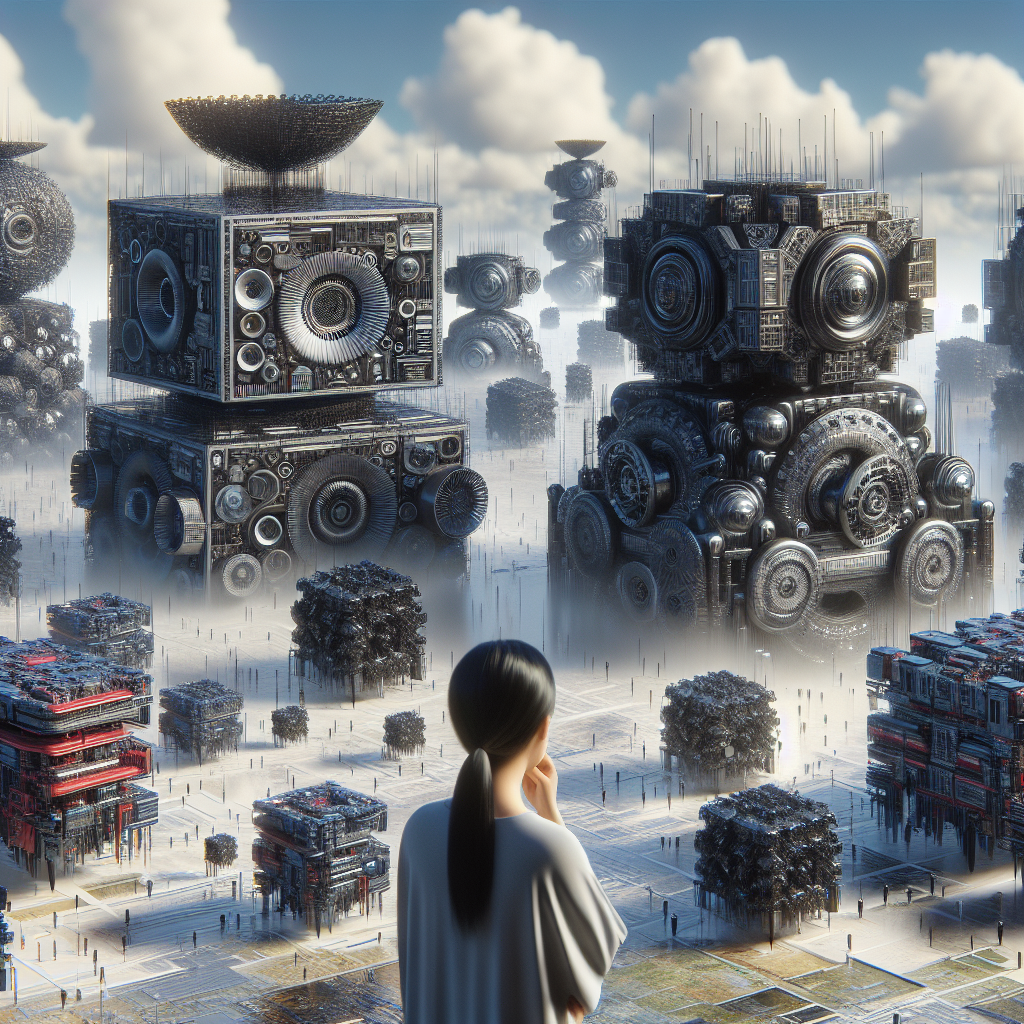

In [43]:
# And just to show you how easy it is: let's generate an image

from IPython.display import Image, display
import base64

response = openai.images.generate(
  model="dall-e-3",
  prompt="A photorealistic 3d image that illustrates someone choosing between a huge number of Large Language Models",
  size="1024x1024",
  quality="standard",
  n=1,
  response_format="b64_json"
)

# Extract the image data and display it
image_base64 = response.data[0].b64_json
image_data = base64.b64decode(image_base64)
display(Image(image_data))

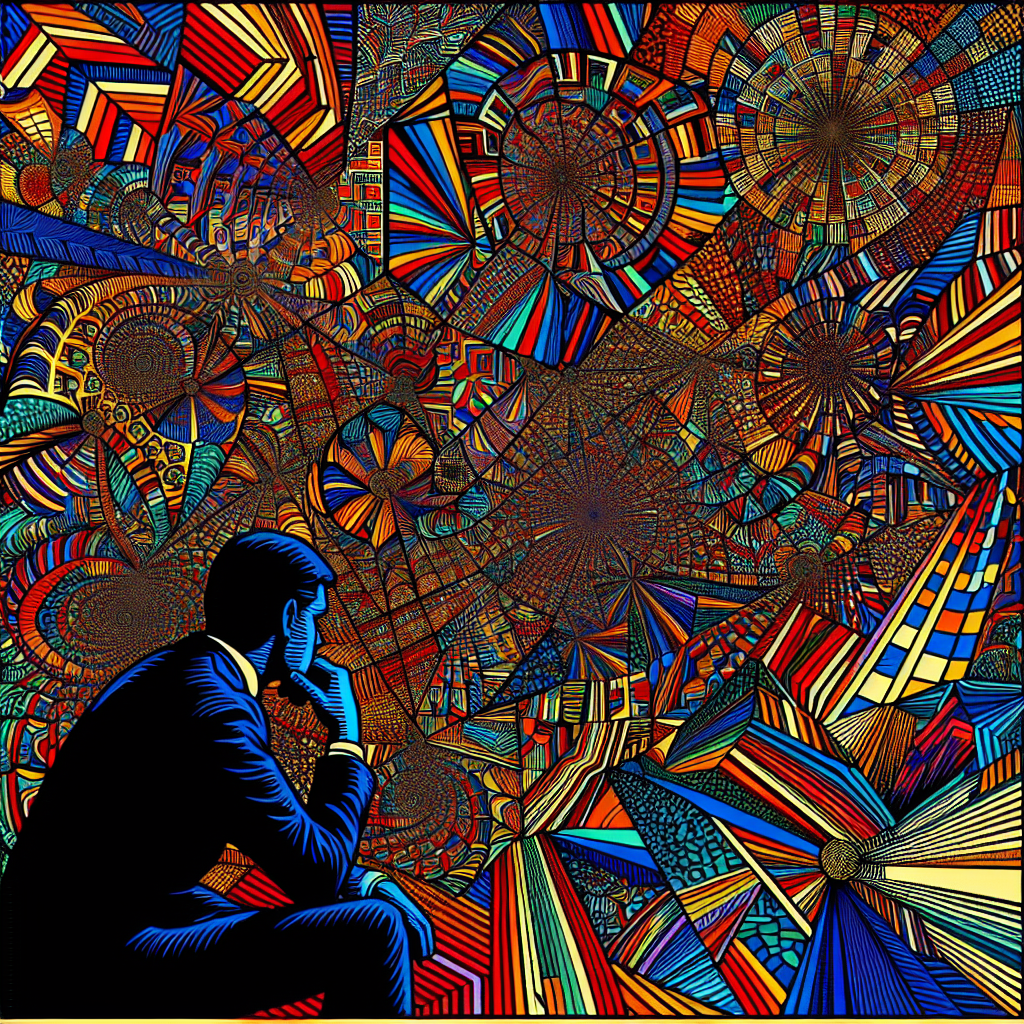

In [44]:
response = openai.images.generate(
  model="dall-e-3",
  prompt="An image that illustrates someone choosing between a huge number of Large Language Models in a vibrant pop-art style, like a Liechtenstein style, with dazzling lines and colors",
  size="1024x1024",
  quality="standard",
  n=1,
  response_format="b64_json"
)

# Extract the image data and display it
image_base64 = response.data[0].b64_json
image_data = base64.b64decode(image_base64)
display(Image(image_data))